# Analysis on Acute Liver Failure using Apache Hadoop
## Submitted By

- G. Yogeshwar | 19MIS1151
- S Jeevana	| 19MIS1169
- Rihana Zainab | 19MIS1167
 

## 1. Data Cleaning 

In [69]:
import pandas as pd
import numpy as np
import statsmodels.api as sapi
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('data.csv')

In [71]:
print(df.head)

<bound method NDFrame.head of       Age Gender Region  Weight  Height  Body Mass Index  Obesity  Waist  \
0      65      M   east    56.0   162.1            21.31      0.0   83.6   
1      36      M  south    60.2   162.2            22.88      0.0   76.6   
2      66      M   east    83.9   162.5            31.77      1.0  113.2   
3      54      M   east    69.4   160.5            26.94      0.0   77.9   
4      63      M  north    73.1   159.2            28.84      0.0   89.3   
...   ...    ...    ...     ...     ...              ...      ...    ...   
8780   35      F   east    70.0   171.5            23.80      0.0   87.5   
8781   66      F  north   102.0   180.7            31.24      1.0  113.2   
8782   37      F  south    84.4   186.0            24.40      0.0   93.6   
8783   39      F   east    92.1   184.8            26.97      0.0   98.2   
8784   70      M   east    58.5   161.1            22.54      0.0   99.4   

      Maximum Blood Pressure  Minimum Blood Pressure  ...

In [72]:
df = df.dropna(axis = 0, subset=['ALF'])
df = df.drop(['Region'], axis=1)


In [73]:
df.drop(['Source of Care'], axis=1)

In [74]:
df = df.replace(to_replace="M", value=0)


In [75]:
df = df.replace(to_replace="F", value=1)


In [76]:
print(df.info)

<bound method DataFrame.info of       Age  Gender  Weight  Height  Body Mass Index  Obesity  Waist  \
0      65       0    56.0   162.1            21.31      0.0   83.6   
1      36       0    60.2   162.2            22.88      0.0   76.6   
2      66       0    83.9   162.5            31.77      1.0  113.2   
3      54       0    69.4   160.5            26.94      0.0   77.9   
4      63       0    73.1   159.2            28.84      0.0   89.3   
...   ...     ...     ...     ...              ...      ...    ...   
5995   77       1   109.3   185.8            31.66      1.0  117.2   
5996   49       1    86.6   168.9            30.36      1.0   99.5   
5997   30       1    78.0   174.9            25.50      0.0   89.2   
5998   75       1    78.8   176.5            25.30      0.0  100.4   
5999   35       0    62.3   164.2            23.11      0.0   87.2   

      Maximum Blood Pressure  Minimum Blood Pressure  Good Cholesterol  ...  \
0                      135.0                    

In [52]:
df.isnull().sum()

Age                         0
Gender                      0
Weight                    133
Height                    139
Body Mass Index           206
Obesity                   206
Waist                     215
Maximum Blood Pressure    206
Minimum Blood Pressure    252
Good Cholesterol            8
Bad Cholesterol             8
Total Cholesterol           6
Dyslipidemia                0
PVD                         0
Physical Activity           8
Education                  15
Unmarried                 301
Income                    792
PoorVision                376
Alcohol Consumption         0
HyperTension               53
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                  13
Family Hepatitis            3
Chronic Fatigue            26
ALF                         0
dtype: int64

In [77]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'Body Mass Index', 'Obesity',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol',
       'Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried',
       'Income', 'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'ALF'],
      dtype='object')

## 2. Dataset Transformation & Featureset Selection

In [59]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'median')


In [80]:
imputer = imp.fit_transform(df)

In [81]:
df = pd.DataFrame(imputer, columns = ['Age', 'Gender', 'Weight', 'Height', 'Body Mass Index', 'Obesity',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol',
       'Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried',
       'Income', 'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'ALF'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     6000 non-null   float64
 1   Gender                  6000 non-null   float64
 2   Weight                  6000 non-null   float64
 3   Height                  6000 non-null   float64
 4   Body Mass Index         6000 non-null   float64
 5   Obesity                 6000 non-null   float64
 6   Waist                   6000 non-null   float64
 7   Maximum Blood Pressure  6000 non-null   float64
 8   Minimum Blood Pressure  6000 non-null   float64
 9   Good Cholesterol        6000 non-null   float64
 10  Bad Cholesterol         6000 non-null   float64
 11  Total Cholesterol       6000 non-null   float64
 12  Dyslipidemia            6000 non-null   float64
 13  PVD                     6000 non-null   float64
 14  Physical Activity       6000 non-null   

In [83]:
df.isnull().sum()

Age                       0
Gender                    0
Weight                    0
Height                    0
Body Mass Index           0
Obesity                   0
Waist                     0
Maximum Blood Pressure    0
Minimum Blood Pressure    0
Good Cholesterol          0
Bad Cholesterol           0
Total Cholesterol         0
Dyslipidemia              0
PVD                       0
Physical Activity         0
Education                 0
Unmarried                 0
Income                    0
PoorVision                0
Alcohol Consumption       0
HyperTension              0
Family  HyperTension      0
Diabetes                  0
Family Diabetes           0
Hepatitis                 0
Family Hepatitis          0
Chronic Fatigue           0
ALF                       0
dtype: int64

In [85]:
df.duplicated().sum()

0

In [89]:
df = df.drop(['Education'], axis=1)

In [90]:
df = df.drop(['Unmarried'], axis=1)

In [91]:
df = df.drop(['Income'], axis=1)

In [92]:
df = df.drop(['PoorVision'], axis=1)

In [93]:
df = df.drop(['Family  HyperTension'], axis=1)

In [94]:
df = df.drop(['Family Diabetes'], axis=1)

In [95]:
df = df.drop(['Family Hepatitis'], axis=1)

In [97]:
df = df.drop(['Total Cholesterol'], axis=1)

In [100]:
df = df.drop(['Body Mass Index'], axis=1)

In [101]:
print(df.columns)

Index(['Age', 'Gender', 'Weight', 'Height', 'Obesity', 'Waist',
       'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol',
       'Bad Cholesterol', 'Dyslipidemia', 'PVD', 'Physical Activity',
       'Alcohol Consumption', 'HyperTension', 'Diabetes', 'Hepatitis',
       'Chronic Fatigue', 'ALF'],
      dtype='object')


In [104]:
correlation_matrix = df.corr()
print(correlation_matrix)

                             Age    Gender    Weight    Height   Obesity  \
Age                     1.000000  0.036107 -0.050409 -0.142165 -0.010784   
Gender                  0.036107  1.000000  0.262554  0.658381 -0.093773   
Weight                 -0.050409  0.262554  1.000000  0.456077  0.653691   
Height                 -0.142165  0.658381  0.456077  1.000000 -0.054439   
Obesity                -0.010784 -0.093773  0.653691 -0.054439  1.000000   
Waist                   0.166562  0.147834  0.861026  0.191410  0.664947   
Maximum Blood Pressure  0.550409  0.040082  0.046244 -0.101181  0.070082   
Minimum Blood Pressure  0.021012  0.157751  0.171857  0.155947  0.093578   
Good Cholesterol        0.040207 -0.321735 -0.311201 -0.195449 -0.176433   
Bad Cholesterol         0.137055  0.034017  0.133646 -0.032161  0.121845   
Dyslipidemia            0.023648  0.093051  0.074541  0.046044  0.049582   
PVD                     0.224636  0.007159 -0.039060 -0.040972 -0.013339   
Physical Act

<AxesSubplot:>

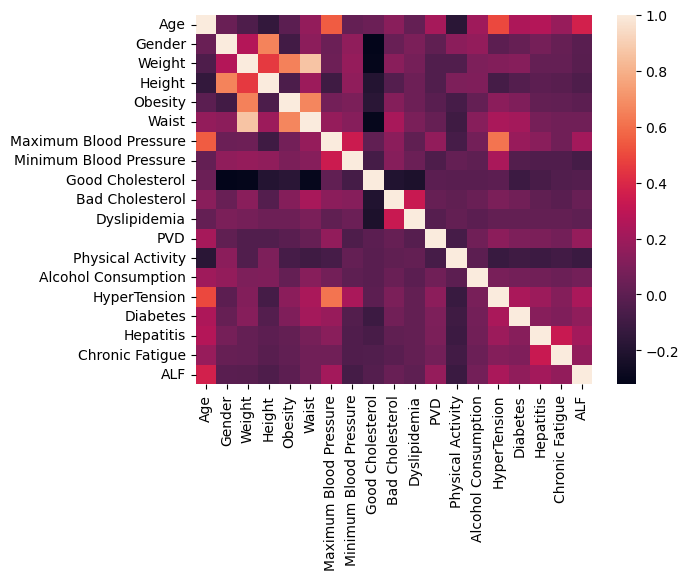

In [105]:
import seaborn as sb
sb.heatmap(correlation_matrix, 
        xticklabels=correlation_matrix.columns,
        yticklabels=correlation_matrix.columns)

In [106]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     6000 non-null   float64
 1   Gender                  6000 non-null   float64
 2   Weight                  6000 non-null   float64
 3   Height                  6000 non-null   float64
 4   Obesity                 6000 non-null   float64
 5   Waist                   6000 non-null   float64
 6   Maximum Blood Pressure  6000 non-null   float64
 7   Minimum Blood Pressure  6000 non-null   float64
 8   Good Cholesterol        6000 non-null   float64
 9   Bad Cholesterol         6000 non-null   float64
 10  Dyslipidemia            6000 non-null   float64
 11  PVD                     6000 non-null   float64
 12  Physical Activity       6000 non-null   float64
 13  Alcohol Consumption     6000 non-null   float64
 14  HyperTension            6000 non-null   

## 3. Model Selection

### 1. Naive Bayes

In [108]:
y = df['ALF']
df = df.drop('ALF',axis=1)
X = df


In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [113]:
#splitting our dataset into training sets and teset sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y)

In [114]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [115]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [116]:


from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



Model accuracy score: 0.8740


In [117]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8560
Test set score: 0.8740


In [118]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1241  143]
 [  46   70]]

True Positives(TP) =  1241

True Negatives(TN) =  70

False Positives(FP) =  143

False Negatives(FN) =  46


###  2. KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [126]:
knn = KNeighborsClassifier(n_neighbors=7)

In [127]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [132]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

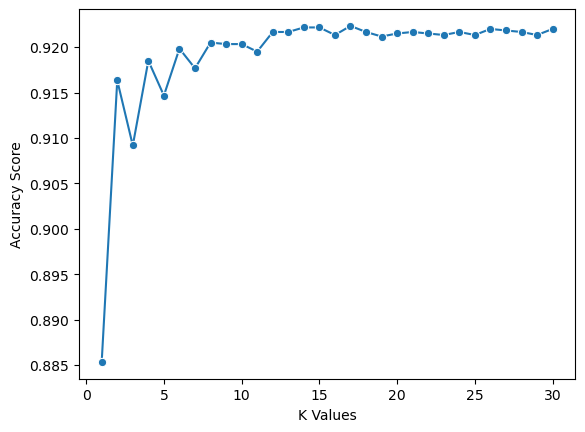

In [134]:
sb.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [135]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [140]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Conclusion")
print("K = ",best_k)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Conclusion
K =  17
Accuracy: 0.918
Precision: 0.23076923076923078
Recall: 0.02586206896551724


In [141]:
df.head

<bound method NDFrame.head of        Age  Gender  Weight  Height  Obesity  Waist  Maximum Blood Pressure  \
0     65.0     0.0    56.0   162.1      0.0   83.6                   135.0   
1     36.0     0.0    60.2   162.2      0.0   76.6                    96.0   
2     66.0     0.0    83.9   162.5      1.0  113.2                   115.0   
3     54.0     0.0    69.4   160.5      0.0   77.9                   110.0   
4     63.0     0.0    73.1   159.2      0.0   89.3                   132.0   
...    ...     ...     ...     ...      ...    ...                     ...   
5995  77.0     1.0   109.3   185.8      1.0  117.2                   149.0   
5996  49.0     1.0    86.6   168.9      1.0   99.5                   130.0   
5997  30.0     1.0    78.0   174.9      0.0   89.2                   126.0   
5998  75.0     1.0    78.8   176.5      0.0  100.4                   129.0   
5999  35.0     0.0    62.3   164.2      0.0   87.2                    95.0   

      Minimum Blood Pressure  Goo

In [144]:
df.to_csv("cleaned_data.csv", encoding='utf-8', index=False)